In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

In [89]:
image = np.full((24,32),255)

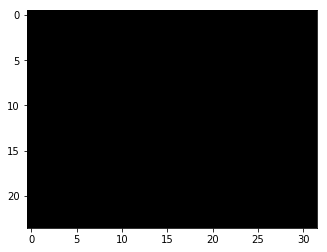

In [90]:
plt.imshow(image,cmap='gray')

In [91]:
image[1,1:21]=0

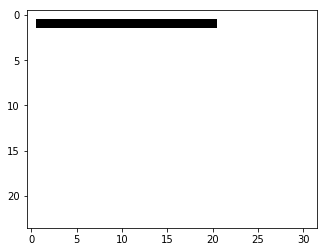

In [92]:
plt.imshow(image,cmap='gray')

In [93]:
image[1:11,1]=0

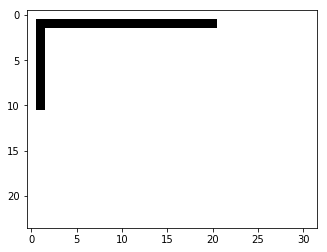

In [94]:
plt.imshow(image,cmap='gray')

In [95]:
image[10,1:21]=0

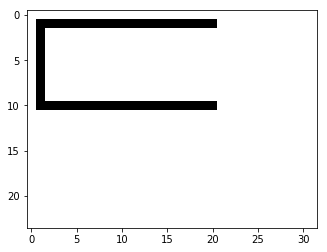

In [96]:
plt.imshow(image,cmap='gray')

In [97]:
image[1:11,20]=0

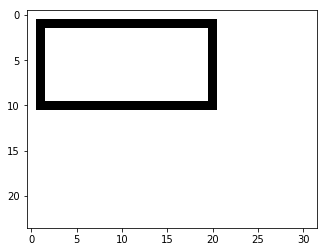

In [98]:
plt.imshow(image,cmap='gray')

In [99]:
def pad(img,shp):
    p=np.zeros((shp[0]+2,shp[1]+2))
    p[1:-1,1:-1]=np.copy(img)
    p[0,1:-1],p[-1,1:-1]=img[0],img[-1]
    p[1:-1,0],p[1:-1,-1]=img[:,0],img[:,-1]
    p[0,0],p[0,-1]=img[0,0],img[0,-1]
    p[-1,0],p[-1,-1]=img[-1,0],img[-1,-1]
    return p

In [100]:
padded_image = pad(image,image.shape)

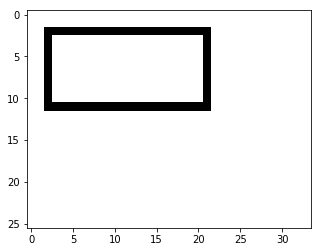

In [101]:
plt.imshow(padded_image,cmap='gray')

In [112]:
def sobel_filter(img):
    sabel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    sabel_y = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
    shp = img.shape
    shpm=(3,3)
    padded_img=pad(img,shp)
    grad_matrix=np.zeros(shp)
    out=np.zeros(shp)
    exp = np.zeros(shp)
    for i in range(shp[0]):
        for j in range(shp[1]):
            g_x=np.multiply(padded_img[i:i+shpm[0],j:j+shpm[1]],sabel_x).sum()
            g_y=np.multiply(padded_img[i:i+shpm[0],j:j+shpm[1]],sabel_y).sum()
            if g_y!=0 or g_x!=0:
                if g_x==0:
                    rad=np.arctan2(g_y,g_x)
                else:
                    rad=np.arctan2(g_y,g_x)
                deg=rad*(180/np.pi)
                rad_rev = deg*(np.pi/180)
                #print(rad*(180/np.pi),end=" ")
                #print(rad_rev)
                grad_matrix[i][j]=deg
                if grad_matrix[i][j]<0:
                    exp[i][j] = grad_matrix[i][j]
                out[i][j] = np.sqrt(np.square(g_x)+np.square(g_y))
            else:
                out[i,j]=0
                grad_matrix[i][j]=255
    out=np.array(out, dtype = np.uint8)
    grad_matrix=np.array(grad_matrix,dtype= np.uint8)
    
    return out,grad_matrix,exp

In [113]:
output, grad_matrix, exp = sobel_filter(image)

In [114]:
output

array([[104,  38, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252,
        252, 252, 252, 252, 252, 252, 252,  38, 104,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [ 38, 209, 104,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 104, 209,  38,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [252, 104,  57, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252,
        252, 252, 252, 252, 252, 252,  57, 104, 252,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [252,   0, 252,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 252,   0, 252,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [252,   0, 252,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 252,   0, 252,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [252,   0, 252,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
  

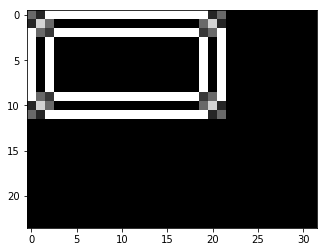

In [115]:
plt.imshow(output,cmap='gray')

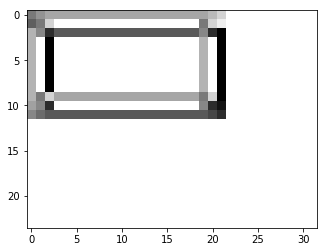

In [116]:
plt.imshow(grad_matrix,cmap='gray')

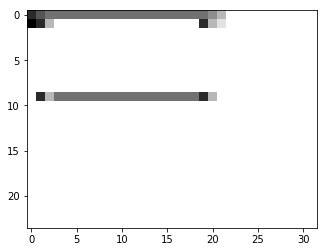

In [117]:
plt.imshow(exp,cmap='gray')

In [118]:
def threshold(grad_matrix,angle_min,angle_max):
    
    output = np.zeros(grad_matrix.shape)
    for i in range(grad_matrix.shape[0]):
        for j in range(grad_matrix.shape[1]):
            
            if grad_matrix[i][j]<=angle_max and grad_matrix[i][j]>=angle_min:
                output[i][j] = 255
                print(grad_matrix[i][j])
            else:
                output[i][j] = 0
    return output

In [135]:
side_pair1 = threshold(grad_matrix,46,90)

90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
71


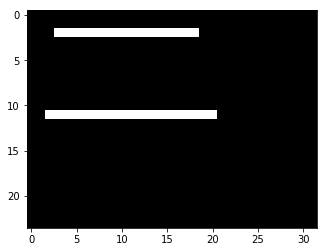

In [136]:
plt.imshow(side_pair1,cmap='gray')

In [139]:
side_pair2 = threshold(grad_matrix,0,44)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
18


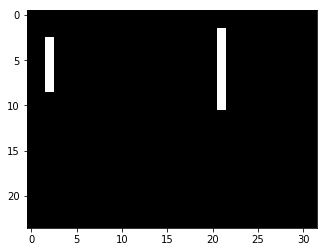

In [140]:
plt.imshow(side_pair2,cmap='gray')

In [148]:
def prewitt_filter(img):
    prewitt_x = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    prewitt_y = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
    shp = img.shape
    shpm=(3,3)
    padded_img=pad(img,shp)
    grad_matrix=np.zeros(shp)
    out=np.zeros(shp)
    exp = np.zeros(shp)
    for i in range(shp[0]):
        for j in range(shp[1]):
            g_x=np.multiply(padded_img[i:i+shpm[0],j:j+shpm[1]],prewitt_x).sum()
            g_y=np.multiply(padded_img[i:i+shpm[0],j:j+shpm[1]],prewitt_y).sum()
            if g_y!=0 or g_x!=0:
                if g_x==0:
                    rad=np.arctan2(g_y,g_x)
                else:
                    rad=np.arctan2(g_y,g_x)
                deg=rad*(180/np.pi)
                rad_rev = deg*(np.pi/180)
                #print(rad*(180/np.pi),end=" ")
                #print(rad_rev)
                grad_matrix[i][j]=deg   
                if grad_matrix[i][j]<0:
                    exp[i][j] = grad_matrix[i][j]
                    print(exp[i][j])
                out[i][j] = np.sqrt(np.square(g_x)+np.square(g_y))
            else:
                out[i,j]=0
                grad_matrix[i][j]=255
    out=np.array(out, dtype = np.uint8)
    
    return out,grad_matrix,exp

In [149]:
output2, grad_matrix2,exp2 = prewitt_filter(image)

-135.0
-45.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-135.0
-45.0
-153.434948822922
-135.0
-45.0
-135.0
-45.0
-26.56505117707799
-135.0
-116.56505117707799
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-90.0
-63.43494882292201
-45.0


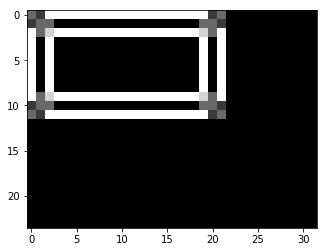

In [150]:
plt.imshow(output2,cmap='gray')

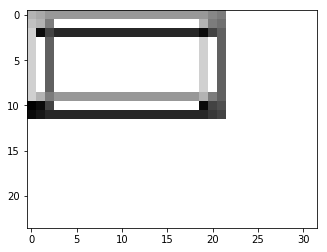

In [146]:
plt.imshow(grad_matrix2,cmap='gray')

In [160]:
side_pair3 = threshold(grad_matrix2,46,90)

90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
63.43494882292201
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0


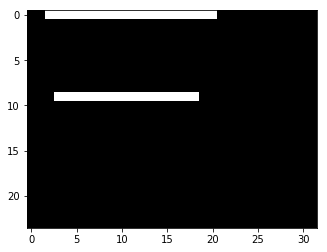

In [161]:
plt.imshow(side_pair3,cmap='gray')

In [162]:
side_pair4 = threshold(grad_matrix2,0,44)

26.56505117707799
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


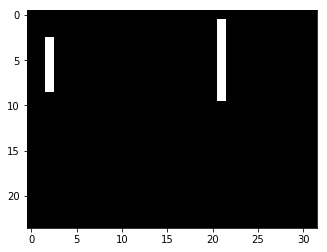

In [163]:
plt.imshow(side_pair4,cmap='gray')

In [ ]:
def corner_points(image):
    
    corner_points = []
    
    for i in image.shape[0]:
        for j in image.shape[1]:
            if image[i][j]==255:
                